## LOB Cuskit Launch impacted by Covid-19 Cases

__Covid-19 Dataset Source:__ https://ourworldindata.org/covid-cases

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import math

df = pd.read_csv('data/owid-covid-data.csv')

In [2]:
#Removing unnecessary columns 
df.drop(['total_cases','new_cases_smoothed','total_deaths','new_deaths_smoothed','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','icu_patients_per_million','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests','new_tests','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','tests_per_case','tests_units','total_vaccinations','new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred','new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred','stringency_index','median_age','aged_65_older','aged_70_older','gdp_per_capita','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','excess_mortality_cumulative_absolute','excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million','iso_code','continent','positive_rate','reproduction_rate','people_vaccinated','total_boosters','population','population_density'], axis = 1, inplace = True)

#Defining unnecessary rows
removedRows = ["Africa","Albania","Algeria","Andorra","Angola","Anguilla","Antigua and Barbuda","Aruba","Asia","Azerbaijan","Bahamas","Bahrain","Barbados","Belize","Benin","Bermuda","Bolivia","Bonaire Sint Eustatius and Saba","Bosnia and Herzegovina","Botswana","British Virgin Islands","Bulgaria","Burkina Faso","Burundi","Cameroon","Cape Verde","Cayman Islands","Central African Republic","Chad","Comoros","Congo","Costa Rica","Cote d'Ivoire","Croatia","Cuba","Curacao","Cyprus","Democratic Republic of Congo","Djibouti","Dominica","Dominican Republic","Ecuador","Egypt","El Salvador","Equatorial Guinea","Eritrea","Estonia","Eswatini","Ethiopia","Europe","European Union","Faeroe Islands","Falkland Islands","French Polynesia","Gabon","Gambia","Georgia","Ghana","Gibraltar","Greenland","Grenada","Guatemala","Guernsey","Guinea","Guinea-Bissau","Guyana","Haiti","High income","Honduras","Iceland","International","Iran","Iraq","Isle of Man","Israel","Jamaica","Jersey","Jordan","Kenya","Kosovo","Kuwait","Latvia","Lebanon","Lesotho","Liberia","Libya","Liechtenstein","Lithuania","Low income","Lower middle income","Macao","Madagascar","Malawi","Mali","Malta","Marshall Islands","Mauritania","Mauritius","Micronesia (country)","Monaco","Montenegro","Montserrat","Morocco","Mozambique","Namibia","New Caledonia","Nicaragua","Niger","Nigeria","Niue","North America","North Macedonia","Northern Cyprus","Oceania","Oman","Palestine","Panama","Paraguay","Pitcairn","Qatar","Romania","Rwanda","Saint Helena","Saint Kitts and Nevis","Saint Lucia","Saint Pierre and Miquelon","Saint Vincent and the Grenadines","San Marino","Sao Tome and Principe","Saudi Arabia","Senegal","Serbia","Seychelles","Sierra Leone","Sint Maarten (Dutch part)","Slovenia","Somalia","South America","South Sudan","Sudan","Suriname","Syria","Tanzania","Togo","Tokelau","Trinidad and Tobago","Tunisia","Turkmenistan","Turks and Caicos Islands","Uganda","Ukraine","United Arab Emirates","Upper middle income","Uruguay","Uzbekistan","Vatican","Wallis and Futuna","World","Yemen","Zambia","Zimbabwe"]

In [3]:
region = []

for row in df['location']:
    if row == 'Afghanistan':region.append('APJ') #APJ 1
    elif row == 'Australia':region.append('APJ') # APJ 2
    elif row == 'Bangladesh':region.append('APJ') # APJ 3
    elif row == 'Bhutan':region.append('APJ') #APJ 4
    elif row == 'Brunei':region.append('APJ') #APJ 5
    elif row == 'Cambodia':region.append('APJ') #APJ 6
    elif row == 'China':region.append('APJ') #APJ 7
    elif row == 'Cook Islands':region.append('APJ') #APJ 8
    elif row == 'Fiji':region.append('APJ') #APJ 9
    elif row == 'Hong Kong':region.append('APJ') #APJ 10
    elif row == 'India':region.append('APJ') #APJ 11
    elif row == 'Indonesia':region.append('APJ') #APJ 12
    elif row == 'Japan':region.append('APJ') #APJ 13
    elif row == 'Kiribati':region.append('APJ') #APJ 14
    elif row == 'Laos':region.append('APJ') #APJ 15
    elif row == 'Malaysia':region.append('APJ') #APJ 16
    elif row == 'Maldives':region.append('APJ') #APJ 17
    elif row == 'Mongolia':region.append('APJ') #APJ 18
    elif row == 'Myanmar':region.append('APJ') #APJ 19
    elif row == 'Nauru':region.append('APJ') #APJ 20
    elif row == 'Nepal':region.append('APJ') #APJ 21
    elif row == 'New Zealand':region.append('APJ') #APJ 22
    elif row == 'Pakistan':region.append('APJ') #APJ 23
    elif row == 'Palau':region.append('APJ') #APJ 24
    elif row == 'Papua New Guinea':region.append('APJ') #APJ 25
    elif row == 'Philippines':region.append('APJ') #APJ 26
    elif row == 'Samoa':region.append('APJ') #APJ 27
    elif row == 'Singapore':region.append('APJ') #APJ 28
    elif row == 'Solomon Islands':region.append('APJ') #APJ 29
    elif row == 'South Korea':region.append('APJ') #APJ 30
    elif row == 'Sri Lanka':region.append('APJ') #APJ 31
    elif row == 'Taiwan':region.append('APJ') #APJ 32
    elif row == 'Thailand':region.append('APJ') #APJ 33
    elif row == 'Timor':region.append('APJ') #APJ 34
    elif row == 'Tonga':region.append('APJ') #APJ 35
    elif row == 'Tuvalu':region.append('APJ') #APJ 36
    elif row == 'Vanuatu':region.append('APJ') #APJ 37
    elif row == 'Vietnam':region.append('APJ') #APJ 38
    elif row == 'Argentina':region.append('AMER') #AMER 1
    elif row == 'Brazil':region.append('AMER') #AMER 2
    elif row == 'Canada':region.append('AMER') #AMER 3
    elif row == 'Chile':region.append('AMER') #AMER 4
    elif row == 'Colombia':region.append('AMER') #AMER 5
    elif row == 'Mexico':region.append('AMER') #AMER 6
    elif row == 'Peru':region.append('AMER') #AMER 7
    elif row == 'United States':region.append('AMER') #AMER 8
    elif row == 'Venezuela':region.append('AMER') #AMER 9
    else: region.append('EMEA')
    

df['Region'] = region
first_column = df.pop('Region')
df.insert(0, 'Region', first_column)
df

,Region,location,date,new_cases,new_deaths,icu_patients,hosp_patients,people_fully_vaccinated,extreme_poverty
0,APJ,Afghanistan,2020-02-24,5.0,NaN,NaN,NaN,NaN,NaN
1,APJ,Afghanistan,2020-02-25,0.0,NaN,NaN,NaN,NaN,NaN
2,APJ,Afghanistan,2020-02-26,0.0,NaN,NaN,NaN,NaN,NaN
3,APJ,Afghanistan,2020-02-27,0.0,NaN,NaN,NaN,NaN,NaN
4,APJ,Afghanistan,2020-02-28,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
176216,EMEA,Zimbabwe,2022-03-30,140.0,1.0,NaN,NaN,3522062.0,21.4
176217,EMEA,Zimbabwe,2022-03-31,104.0,4.0,NaN,NaN,3532708.0,21.4
176218,EMEA,Zimbabwe,2022-04-01,128.0,0.0,NaN,NaN,3543725.0,21.4
176219,EMEA,Zimbabwe,2022-04-02,67.0,2.0,NaN,NaN,3553083.0,21.4


In [4]:
# Removing unnecessary rows
df = df[df.location.isin(removedRows) == False]

# Replacing null value to zero
df = df.replace(np.nan, 0)

#Removing 0 value rows
df = df.loc[(df == 0).any(axis=1)]

In [5]:
# Converting Date column into Datetime format
from datetime import datetime
df['date'] = pd.to_datetime(df['date'])

# Renaming column name
df.rename(columns = {'location':'Location', 'date':'Year'}, inplace = True)

In [6]:
# Grouping columns by Region, Location & Year
groupbyYear = df.groupby([(df.Year.dt.year)]).agg(
    New_Cases = ('new_cases','sum'),
    New_Deaths = ('new_deaths','sum'),
    ICU_Patients = ('icu_patients','sum'),
    Hosp_Patients = ('hosp_patients','sum'),
    People_Fully_Vaccinated = ('people_fully_vaccinated','sum'),
    Extreme_Poverty = ('extreme_poverty','sum'),).reset_index()
groupbyYear

,Year,New_Cases,New_Deaths,ICU_Patients,Hosp_Patients,People_Fully_Vaccinated,Extreme_Poverty
0,2020,68075683.0,1585561.0,5481589.0,26189180.0,2.534000e+03,58706.2
1,2021,116365073.0,2290268.0,5093171.0,17463957.0,2.010295e+11,78395.5
2,2022,125486365.0,388536.0,1002177.0,6051090.0,1.823362e+11,19755.3


In [7]:
# Grouping columns by Location, Year
groupbyLocation = df.groupby([(df.Location)]).agg(
    New_Cases = ('new_cases','sum'),
    New_Deaths = ('new_deaths','sum'),
    ICU_Patients = ('icu_patients','sum'),
    Hosp_Patients = ('hosp_patients','sum'),
    People_Fully_Vaccinated = ('people_fully_vaccinated','sum'),
    Extreme_Poverty = ('extreme_poverty','sum'),).reset_index()
groupbyLocation

,Location,New_Cases,New_Deaths,ICU_Patients,Hosp_Patients,People_Fully_Vaccinated,Extreme_Poverty
0,Afghanistan,177835.0,7671.0,0.0,0.0,7.771675e+07,0.0
1,Argentina,9041124.0,128065.0,1892274.0,0.0,7.295752e+09,494.4
2,Armenia,422574.0,8619.0,0.0,0.0,1.407558e+07,1423.8
3,Australia,126903.0,1083.0,7222.0,64175.0,1.733309e+08,275.0
4,Austria,3356737.0,14488.0,157944.0,866079.0,2.070997e+07,495.6
...,...,...,...,...,...,...,...
76,United States,16267924.0,301999.0,1941536.0,7213754.0,4.349459e+08,394.8
77,United States Virgin Islands,0.0,0.0,0.0,0.0,0.000000e+00,0.0
78,Vanuatu,4237.0,2.0,0.0,0.0,7.196850e+05,6732.0
79,Venezuela,520843.0,5692.0,0.0,0.0,1.569385e+08,0.0


In [8]:
# CSV file
groupbyYear = pd.DataFrame(groupbyYear)
groupbyYear.to_csv('data/groupbyYear.csv',index=False)

groupbyLocation = pd.DataFrame(groupbyLocation)
groupbyLocation.to_csv('data/groupbyCountry.csv',index=False)

In [18]:
# set width of bars
w = 0.5

# Figure Size
fig = plt.figure(figsize =(10, 8))

# Define x-axis
year = groupbyYear['Year']

minimum = min(year)
maximum = max(year)
newnum = range(math.floor(min(year)), math.ceil(max(year))+1)

# Define y-axis
cases = groupbyYear['New_Cases']
deaths = groupbyYear['New_Deaths']
icu = groupbyYear['ICU_Patients']
hosp = groupbyYear['Hosp_Patients']
vaccine = groupbyYear['People_Fully_Vaccinated']
povetry = groupbyYear['Extreme_Poverty']

ind = [years for years in year]

<Figure size 720x576 with 0 Axes>

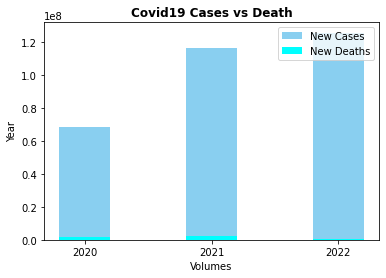

In [19]:
# Make the plot
plt.bar(year, cases, 0.4, color='#89CFF0', label='New Cases')
plt.bar(year, deaths, 0.4, color='#00FFFF', label='New Deaths')

# Add xticks on the middle of the group bars
plt.xlabel('Volumes')
plt.ylabel('Year')
plt.title("Covid19 Cases vs Death", fontweight='bold')
plt.xticks(newnum)
 
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'Volumes')

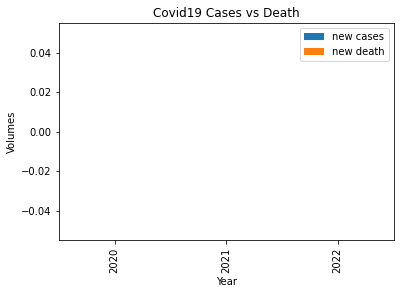

In [13]:
# plotdata = pd.DataFrame({
#     "new cases":groupbyYear['New_Cases'],
#     "new death":groupbyYear['New_Deaths'],
#     }, 
#     index=groupbyYear['Year']
# )
# plotdata.plot(kind="bar")
# plt.title("Covid19 Cases vs Death")
# plt.xlabel("Year")
# plt.ylabel("Volumes")

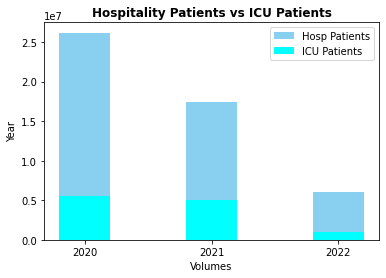

In [20]:
# Make the plot
plt.bar(ind, hosp, 0.4, color='#89CFF0', label='Hosp Patients')
plt.bar(ind, icu, 0.4, color='#00FFFF', label='ICU Patients')
 
# Add xticks on the middle of the group bars
plt.xlabel('Volumes')
plt.ylabel('Year')
plt.title("Hospitality Patients vs ICU Patients", fontweight='bold')
plt.xticks(newnum)
 
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.show()

__Image Source:__ https://cordis.europa.eu/article/id/435709-investigating-europe-s-life-saving-lockdown-policies
![image info](images/lockdown.jpg)

__Image Source:__ https://www.sciencedirect.com/science/article/pii/S0959652621019235
![image info](images/covidimpact.jpg)

Due to the spike of Covid19 Cases, there are several sectors was impacted such as human lifestyle, economy, environment, energy sector.

__LOB Cuskit Launch Dataset__

In [ ]:
lob = pd.read_csv("data/LOB Cuskit Launches.csv")
lob.head()

In [ ]:
groupLOB = lob.groupby([(lob.Year)]).agg(
    TotalL = ('Total Launch','sum'),
    FluctuateL = ('Launch Fluctuation','sum'),).reset_index()
groupLOB

In [ ]:
# set width of bars
w = 0.5

# Figure Size
fig = plt.figure(figsize =(10, 8))

# Define x-axis
quarter = groupLOB['Year']

# Define y-axis
TotalL = groupLOB['TotalL']
FluctuateL = groupLOB['FluctuateL']

# Make the plot
plt.bar(quarter, TotalL, 0.4, color='#89CFF0', label='Total Launch')
plt.bar(quarter, FluctuateL, 0.4, color='#00FFFF', label='Launch Fluctuation')

# Add xticks on the middle of the group bars
plt.xlabel('Year')
plt.ylabel('Launches')
plt.title("Total vs Fluctuated Launches", fontweight='bold')
plt.xticks(quarter)
 
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.show()

__LOB Cuskit Revenue__

In [46]:
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
rev = pd.read_csv("data/SKU Sold Detail.csv")
rev.head()

,Quarter,Region,BU_ID,Country,SKU_NUMBER,Category,Revenue,Margin
0,FY22Q3,AMER,11,United States,020K1,BATTERY,99.99,86.40
1,FY22Q3,AMER,11,United States,06PX9,ACCESSORIES,0.00,0.00
2,FY22Q3,AMER,11,United States,0WF28,BATTERY,0.00,0.00
3,FY22Q3,AMER,11,United States,1P6KD,BATTERY,25413.54,24746.22
4,FY22Q3,AMER,11,United States,1V2F6,BATTERY,281.57,237.47


In [53]:
rev.isnull().sum()

Quarter       0
Region        0
BU_ID         0
Country       0
SKU_NUMBER    0
Category      0
Revenue       0
Margin        0
dtype: int64

C:\Users\wooi_ling_chin\Anaconda3\envs\web\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: float() argument must be a string or a number, not 'StandardScaler'

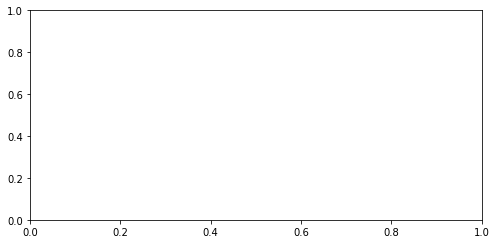

In [56]:
from sklearn.preprocessing import PowerTransformer
p=PowerTransformer()
rev['Revenue']=p.fit_transform(rev[['Revenue']])
import seaborn as sns
sns.distplot(rev.Revenue)

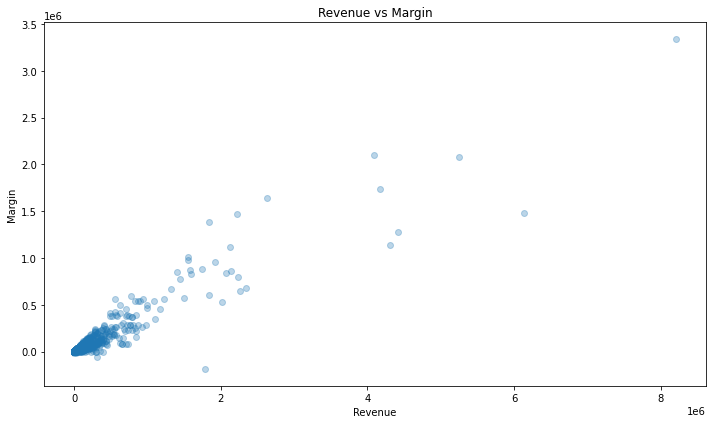

In [44]:
X = DataFrame(rev, columns=['Revenue'])
y = DataFrame(rev, columns=['Margin'])
 
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)
plt.title('Revenue vs Margin')
plt.xlabel('Revenue')
plt.ylabel('Margin')
plt.show()

In [48]:
# Apply Linear Regression
lg = LinearRegression()
lg.fit(X,y)

LinearRegression()

InvalidIndexError: (slice(None, None, None), None)

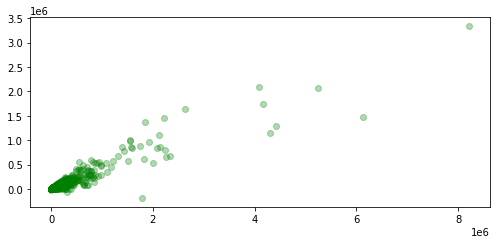

In [50]:
plt.scatter(X, y, alpha=0.3,color="green")
plt.plot(X, lg.predict(X), color='red', linewidth=3)
plt.title("Final Linear Regression Plot")
plt.plot()